# Course: IT Applications to Banking and Finance 

# About the project

This dataset contains **45,000 records** of loan applicants, with various attributes related to **personal demographics**, **financial status**, and **loan details**. It can be used for **predictive modeling**, particularly in **credit risk assessment** and **loan default prediction**.
# About the Dataset

## **Overview**
This dataset contains **45,000 records** of loan applicants, with various attributes related to **personal demographics**, **financial status**, and **loan details**. It can be used for **predictive modeling**, particularly in **credit risk assessment** and **loan default prediction**.

## **Dataset Content**
The dataset includes **14 columns**, representing different factors influencing loan approvals and defaults:

### **Personal Information**
- **person_age**: Age of the applicant (in years).
- **person_gender**: Gender of the applicant (male, female).
- **person_education**: Educational background (High School, Bachelor, Master, etc.).
- **person_income**: Annual income of the applicant (in USD).
- **person_emp_exp**: Years of employment experience.
- **person_home_ownership**: Type of home ownership (RENT, OWN, MORTGAGE).

### **Loan Details**
- **loan_amnt**: Loan amount requested (in USD).
- **loan_intent**: Purpose of the loan (PERSONAL, EDUCATION, MEDICAL, etc.).
- **loan_int_rate**: Interest rate on the loan (percentage).
- **loan_percent_income**: Ratio of loan amount to income.

### **Credit & Loan History**
- **cb_person_cred_hist_length**: Length of the applicant's credit history (in years).
- **credit_score**: Credit score of the applicant.
- **previous_loan_defaults_on_file**: Whether the applicant has previous loan defaults (Yes or No).

### **Target Variable**
- **loan_status**: 1 if the loan was repaid successfully, 0 if the applicant defaulted.

## **Project Description**
The project aims to analyze and predict **binary outcomes** (such as loan defaults, fraud detection, or customer churn) using **machine learning models** like **XGBoost** and **Gradient Boosting Machine (GBM)**, compared to traditional **econometric models** like **Logistic Regression**. The focus is on improving **predictive accuracy** while balancing the need for **model interpretability**. The models are evaluated on their ability to handle **non-linear relationships**, **high-dimensional data**, and **imbalanced classes** in real-world applications.


In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import optuna
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

random_state = 10
np.random.seed(random_state)

c:\Anaconda\envs\AI_Finance\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive - ftu.edu.vn\Desktop\Github\AI-assignment-prj\loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [6]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

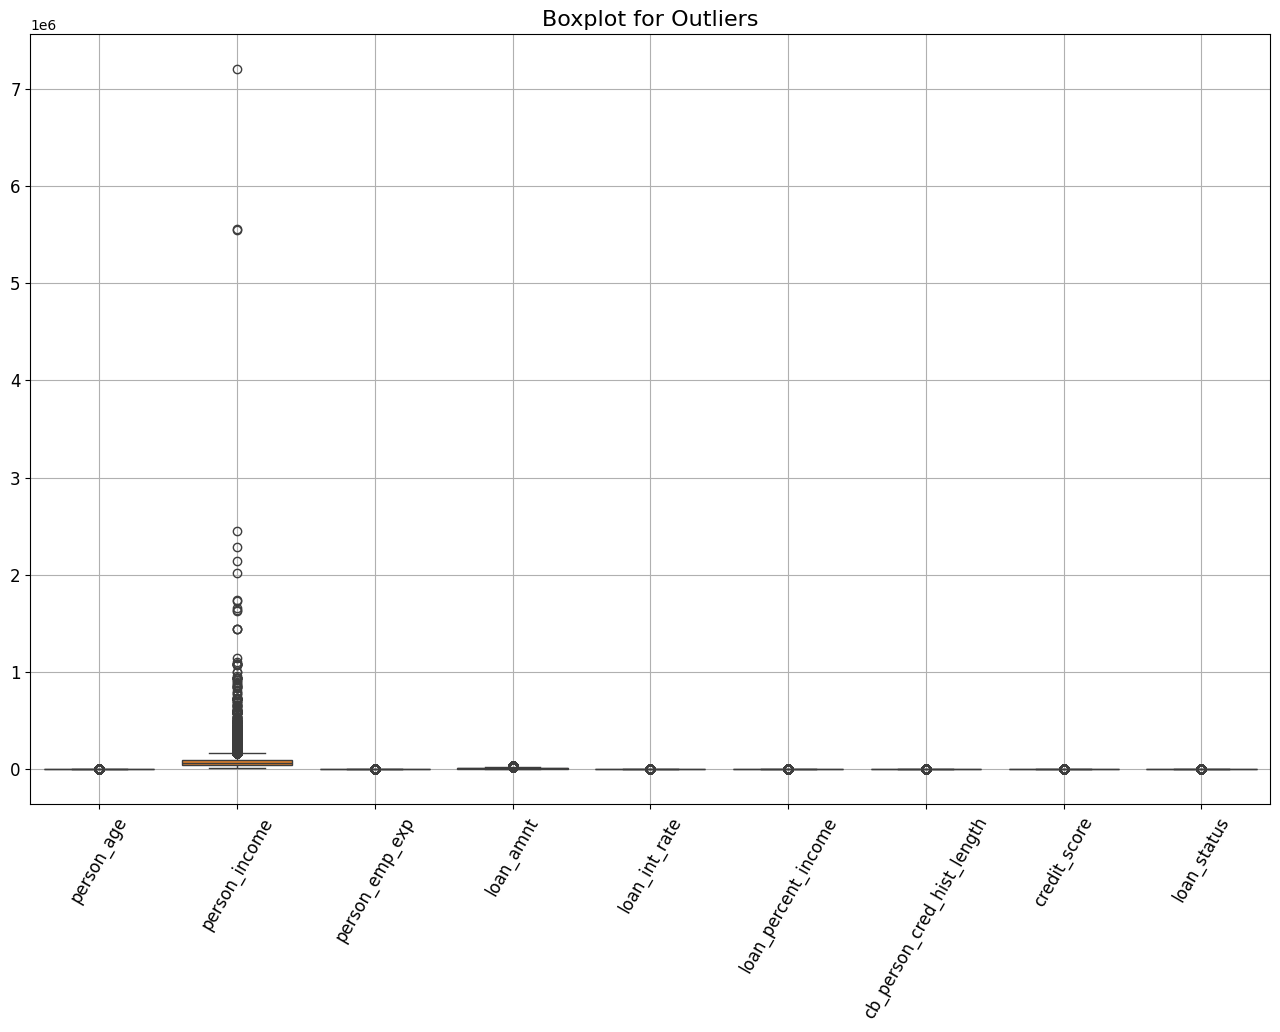

In [7]:
plt.figure(figsize=(16, 10))
sns.boxplot(df)
plt.title('Boxplot for Outliers', fontsize=16)
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


# Outlier Analysis

The boxplot visualizes the distribution of various features and highlights potential outliers for each variable. Below is an analysis of the outliers for each feature:

# **Overall Observations**
- **Income and Loan Amount** have the most significant high-end outliers, which could represent extreme cases or data issues.
- **Age** and **Credit Score** also exhibit some outliers, particularly with high ages and low credit scores.
- **Loan Interest Rate** and **Loan Percent Income** show a few high-end outliers.



{'whiskers': [<matplotlib.lines.Line2D at 0x1edd686c460>,
 'caps': [<matplotlib.lines.Line2D at 0x1edd686c9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1edd686c1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1edd686cee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1edd687b1c0>],
 'means': []}

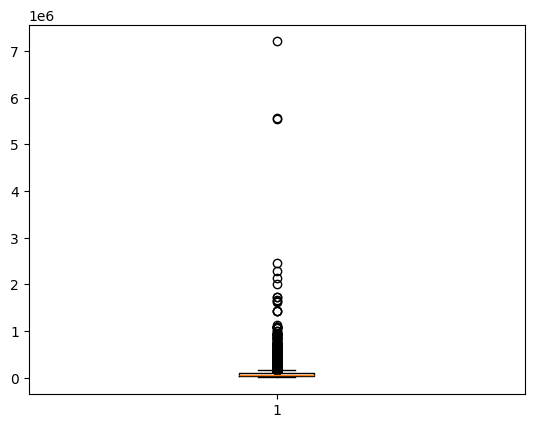

In [8]:
plt.boxplot(df["person_income"])

# Outlier Handling

In [9]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound,df[column])

In [10]:
remove_outliers(df,["person_income"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1edd68d5c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1edd68e9190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1edd68d5970>],
 'medians': [<matplotlib.lines.Line2D at 0x1edd68e96d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1edd68e9970>],
 'means': []}

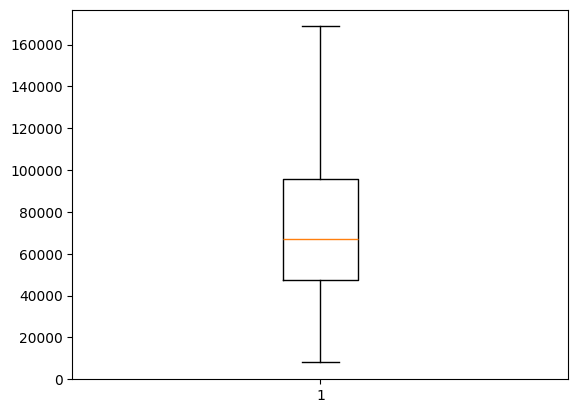

In [11]:
plt.boxplot(df["person_income"])

# Data Preparation 

## Converting Categorical -> Numerical Data 

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = df.round(1)
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Convert categorical columns to integer numerical categories using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]).astype(int)  # Ensure integer type
    label_encoders[col] = le

In [15]:
df.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,0.552022,1.743933,75677.399196,5.410333,1.696622,9583.157556,2.525911,11.005500,0.138662,5.867489,632.608756,0.507956,0.222222
std,6.045108,0.497292,1.479148,38071.776496,6.063532,1.440497,6314.886691,1.728305,2.980337,0.094759,3.879702,50.435865,0.499942,0.415744
min,20.000000,0.000000,0.000000,8000.000000,0.000000,0.000000,500.000000,0.000000,5.400000,0.000000,2.000000,390.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,47204.000000,1.000000,0.000000,5000.000000,1.000000,8.600000,0.100000,3.000000,601.000000,0.000000,0.000000
50%,26.000000,1.000000,1.000000,67048.000000,4.000000,3.000000,8000.000000,3.000000,11.000000,0.100000,4.000000,640.000000,1.000000,0.000000
75%,30.000000,1.000000,3.000000,95789.250000,8.000000,3.000000,12237.250000,4.000000,13.000000,0.200000,8.000000,670.000000,1.000000,0.000000
max,144.000000,1.000000,4.000000,168667.100000,125.000000,3.000000,35000.000000,5.000000,20.000000,0.700000,30.000000,850.000000,1.000000,1.000000


# Dataset Overview

## **Columns and Key Statistics:**

### **1. person_age**:
- **Mean**: 27.76 years, with a **standard deviation** of 6.05 years.
- **Range**: Applicants' ages range from 20 to 144 years (which likely includes outliers).
- **Interpretation**: Most applicants are in the **mid-20s to early 30s**, with some unusual high age values (e.g., 144 years).

### **2. person_gender**:
- **Mean**: 0.55, indicating that about **55%** of the applicants are male (assuming binary encoding: 0 for female, 1 for male).
- **Standard Deviation**: 0.5, showing a balanced distribution between genders.

### **3. person_education**:
- **Mean**: 1.74, suggesting that the majority of applicants have completed at least **High School** or **Bachelor's degree** (if encoded numerically).
- **Standard Deviation**: 1.48, indicating a spread of educational backgrounds.
- **Range**: The applicants have varying educational backgrounds, with values ranging from 0 (possibly indicating no formal education) to 4 (likely indicating a Master's or higher).

### **4. person_income**:
- **Mean**: $75,677, with a **standard deviation** of $38,071.
- **Range**: Incomes range from $8,000 to $168,667.
- **Interpretation**: Most applicants have moderate to high income, but some outliers represent applicants with very high incomes.

### **5. person_emp_exp**:
- **Mean**: 5.41 years of **employment experience**, with a **standard deviation** of 6.06 years.
- **Range**: Employment experience ranges from 0 to 125 years.
- **Interpretation**: While most applicants have relatively few years of experience, a few cases have significantly high years of employment.

### **6. person_home_ownership**:
- **Mean**: 1.70, likely indicating a majority of applicants own their homes or have a mortgage, given the range (0, 1, 2, 3).
- **Standard Deviation**: 1.44, indicating diverse types of home ownership among applicants.

### **7. loan_amnt**:
- **Mean**: $9,583 with a **standard deviation** of $6,314.
- **Range**: Loan amounts range from $500 to $35,000.
- **Interpretation**: Most loan applicants are requesting relatively modest amounts, though a few request much higher amounts.

### **8. loan_intent**:
- **Mean**: 2.53, likely corresponding to common loan purposes (e.g., education, medical, personal).
- **Interpretation**: Most applicants request loans for personal or education purposes.

### **9. loan_int_rate**:
- **Mean**: 11.01%, with a **standard deviation** of 2.98%.
- **Range**: Loan interest rates range from 5.4% to 20%.
- **Interpretation**: The majority of loan applicants are offered rates in the **single-digit** or **low double-digit** percentage range.

### **10. loan_percent_income**:
- **Mean**: 0.14 (or 14%), with a **standard deviation** of 0.09.
- **Interpretation**: The loan amounts requested are typically a relatively small percentage of the applicant's income.

### **11. cb_person_cred_hist_length**:
- **Mean**: 5.87 years, with a **standard deviation** of 3.88 years.
- **Range**: Credit history lengths range from 2 to 30 years.
- **Interpretation**: Most applicants have **moderate to long credit histories**.

### **12. credit_score**:
- **Mean**: 632.61, with a **standard deviation** of 50.44.
- **Range**: Credit scores range from 390 to 850.
- **Interpretation**: A majority of applicants have **mid-range credit scores**, with a few outliers at either end of the spectrum.

### **13. previous_loan_defaults_on_file**:
- **Mean**: 0.51, suggesting that **51%** of applicants have a history of previous loan defaults (0 = no, 1 = yes).
- **Standard Deviation**: 0.50, indicating a balance between applicants with and without defaults.

### **14. loan_status**:
- **Mean**: 0.22, meaning about **22%** of applicants defaulted on their loans (0 = default, 1 = repaid).
- **Interpretation**: The majority of loans in the dataset were repaid.





## EDA 

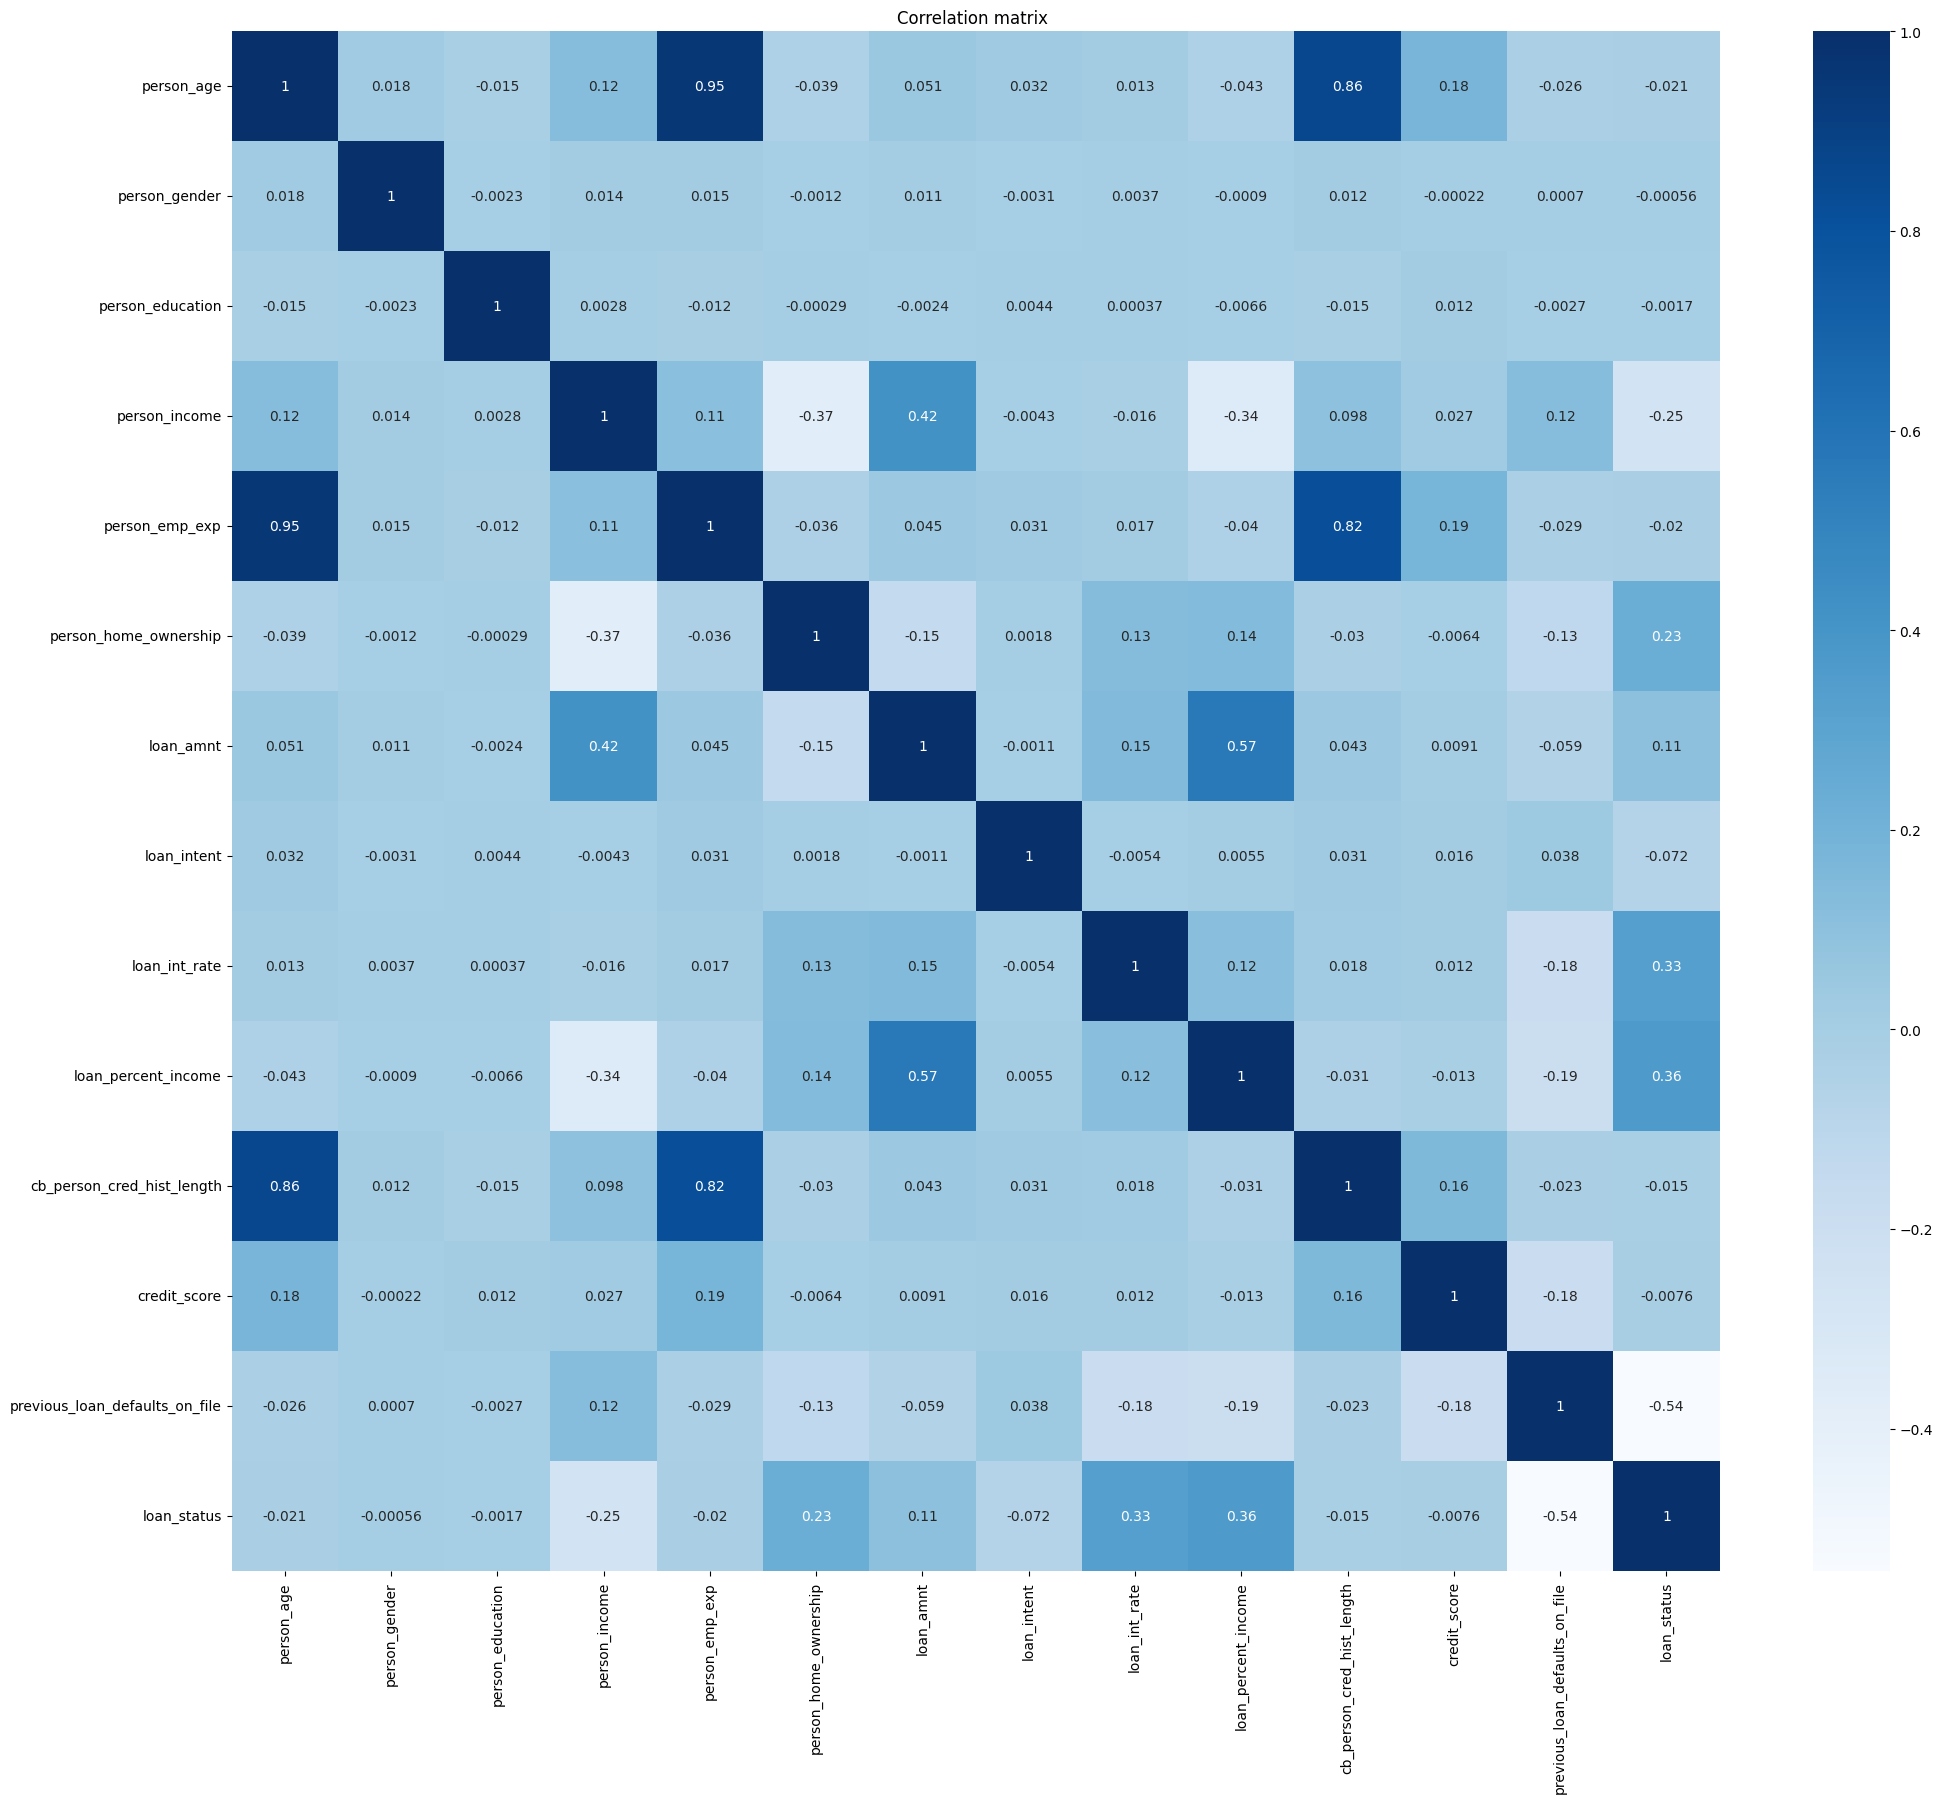

In [16]:
corr = df.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.title("Correlation matrix ")
plt.show()

# Correlation Matrix Analysis

The heatmap visualizes the **correlation matrix** between various features. The correlation coefficient values range from -1 to 1:
- **1** represents perfect positive correlation.
- **-1** represents perfect negative correlation.
- **0** represents no correlation.

## **Key Correlations:**

1. **person_age & person_emp_exp (0.95):**
   - There is a **strong positive correlation** between age and employment experience. Older individuals tend to have more years of work experience.

2. **person_age & db_person_cred_hist_length (0.86):**
   - A **strong positive correlation** is observed between age and credit history length. Older individuals tend to have longer credit histories.

3. **person_income & loan_amnt (0.42):**
   - A **moderate positive correlation** exists between income and loan amount. Higher-income individuals are more likely to apply for larger loans.

4. **person_emp_exp & db_person_cred_hist_length (0.63):**
   - There is a **moderate positive correlation** between employment experience and credit history length, suggesting that individuals with more work experience tend to have longer credit histories.

5. **loan_amnt & loan_percent_income (0.57):**
   - A **moderate positive correlation** exists between loan amount and the percentage of income spent on the loan. Those applying for higher loans tend to dedicate a higher portion of their income to repaying the loan.

6. **loan_int_rate & loan_percent_income (0.57):**
   - A **moderate positive correlation** between loan interest rate and the percentage of income spent on loan payments. Higher interest rates tend to correlate with a higher proportion of income spent on the loan.

7. **loan_int_rate & loan_status (0.54):**
   - A **moderate positive correlation** between loan interest rates and loan approval. Higher interest rates seem to be linked with loan approval, possibly indicating higher-risk loans.

8. **person_home_ownership & loan_amnt (0.42):**
   - A **moderate positive correlation** is seen between home ownership and loan amount, suggesting homeowners are more likely to apply for larger loans.

9. **credit_score & loan_status (0.36):**
   - A **positive correlation** exists between credit score and loan approval. Individuals with higher credit scores are more likely to be approved for loans.

10. **previous_loan_defaults_on_file & loan_status (-0.54):**
    - A **strong negative correlation** exists between previous loan defaults and loan approval. Those who have defaulted on loans in the past are less likely to have their new loans approved.

---

## **Weak or No Correlations:**

1. **person_gender**: 
   - Shows weak correlations with most other features, indicating that gender does not have a significant relationship with the financial or loan-related attributes.

2. **person_education**:
   - Correlation with other variables is generally low, suggesting that education level does not have a strong direct relationship with income, loan amount, or credit score.

3. **loan_int_rate & credit_score (0.18):**
   - There is a **weak positive correlation** between interest rates and credit scores. Higher credit scores are weakly linked to lower interest rates.

---

## **Key Insights:**

1. **Age and Employment**: 
   - Older individuals tend to have more employment experience and longer credit histories, as expected.

2. **Income and Loan Amount**: 
   - Higher income is associated with larger loan amounts, which makes sense given that higher income allows for higher loan repayments.

3. **Homeownership and Loan Amount**:
   - Homeowners tend to apply for larger loans, possibly due to the value of the property they own or the financial stability implied by homeownership.

4. **Credit Score and Loan Status**:
   - Higher credit scores are positively correlated with loan approval, meaning that individuals with better credit histories are more likely to have their loans approved.

5. **Loan Defaults**:
   - Past loan defaults are negatively correlated with loan approval, indicating that individuals who have defaulted on loans are less likely to have new loans approved.




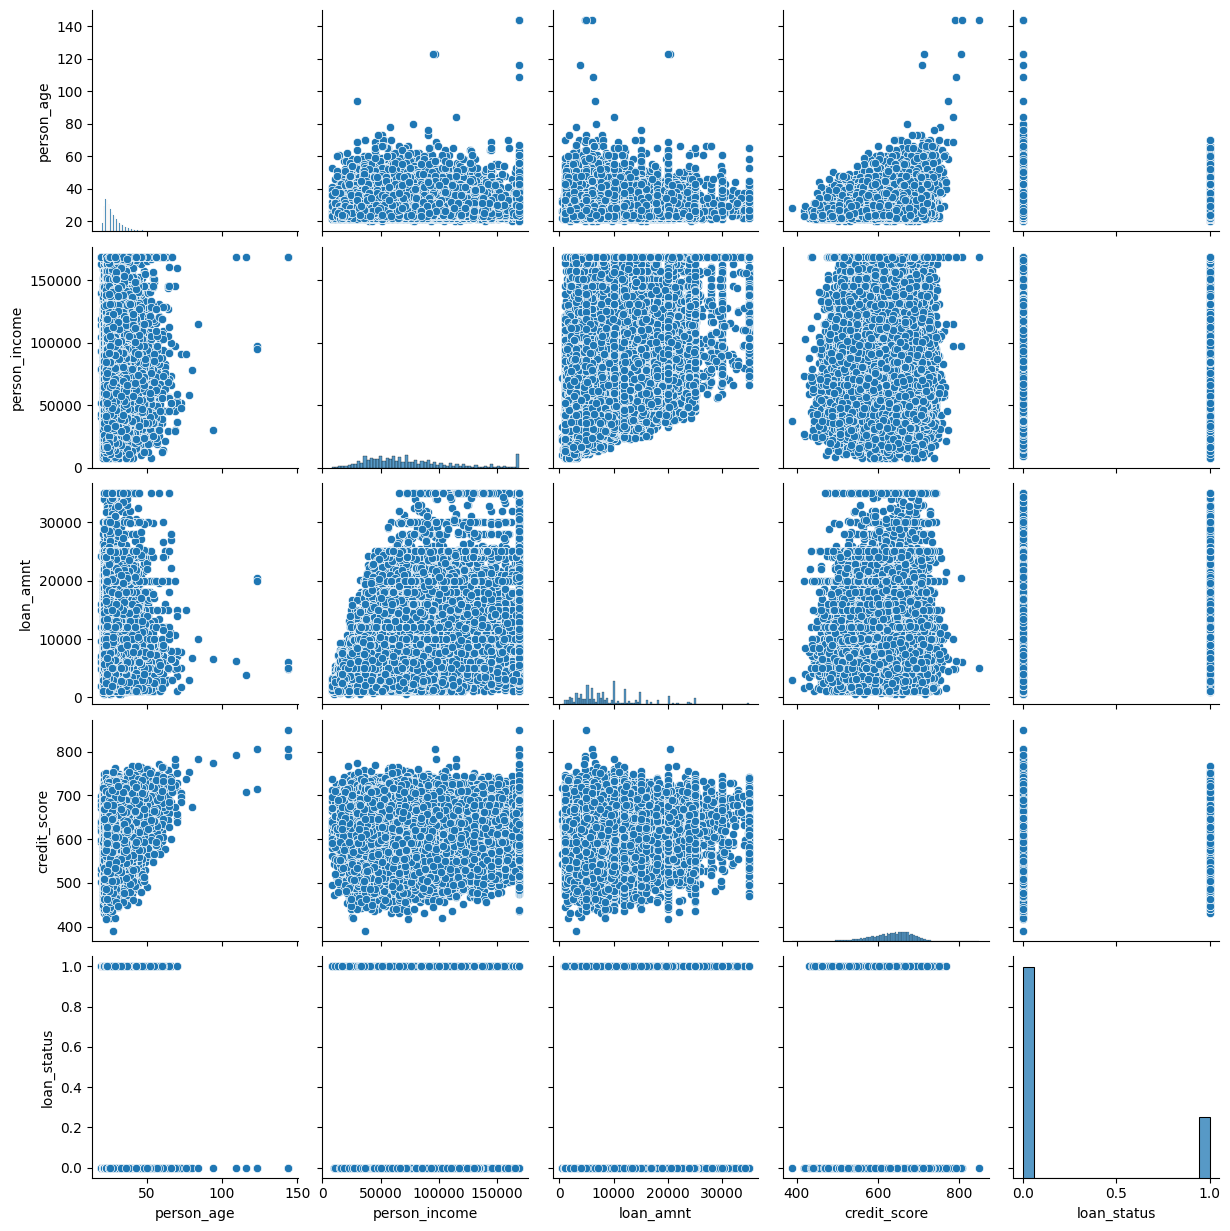

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['person_age', 'person_income', 'loan_amnt', 'credit_score', 'loan_status']])
plt.show()


         feature         VIF
0          const  167.353481
1     person_age    1.047823
2  person_income    1.368925
3      loan_amnt    1.283834
4   credit_score    1.032927
5    loan_status    1.131548


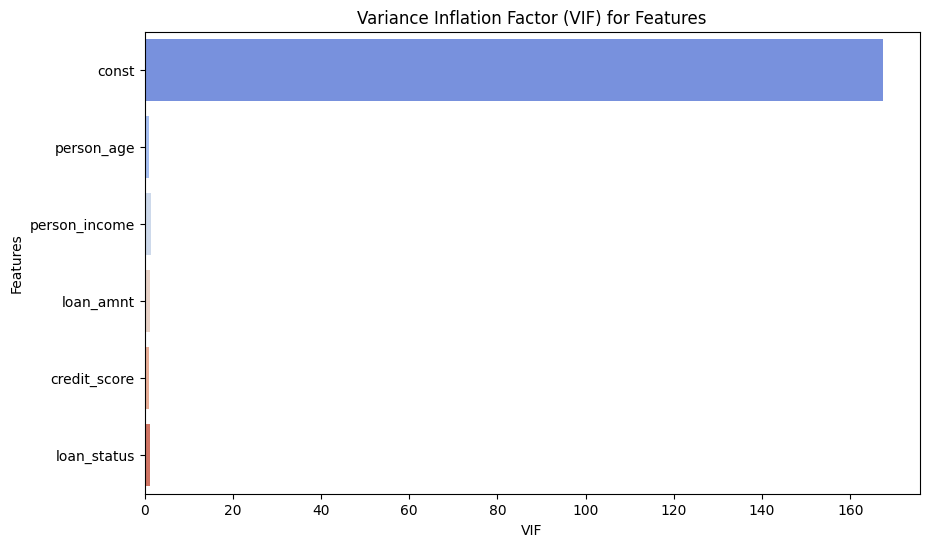

In [23]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculate VIF for each feature
X = df[['person_age', 'person_income', 'loan_amnt', 'credit_score', 'loan_status']]  # select relevant columns
X = add_constant(X)  # add constant term for VIF calculation

# Create DataFrame for VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF Data
print(vif_data)

# Plot the VIF
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='feature', data=vif_data, palette='coolwarm')
plt.title('Variance Inflation Factor (VIF) for Features')
plt.xlabel('VIF')
plt.ylabel('Features')
plt.show()


# Interpretation of VIF Plot

## **Key Observations**:

1. **Constant Term (`const`)**:
   - The **constant term** (`const`) has an extremely high **VIF** value, which is common and expected in linear models when adding an intercept term. This value does not represent **multicollinearity** between variables but is simply an artifact of the model structure.

2. **Other Features**:
   - The **other features** (such as `person_age`, `person_income`, `loan_amnt`, `credit_score`, `loan_status`) show **relatively low VIF values**.
     - None of these features have excessively high VIF values (like above 10), suggesting **no strong multicollinearity** between these features. This means the features are not highly correlated with each other, which avoids issues with unstable regression coefficients.

3. **Interpretation**:
   - The plot indicates that **multicollinearity is not a major issue** for the features (excluding the constant term) in your dataset.
   - The VIF values for individual features are within a reasonable range, suggesting that these features can likely be included in regression models without significant concern about multicollinearity.

---

## **Conclusion**:
- Since **multicollinearity** is not a significant concern based on this plot, you can proceed with **modeling** using these features.




In [26]:
# Handling missing data (if any)
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

## Data Preparation for Model Training 

In [27]:
# Define features and target
X = df.drop('loan_status', axis=1)  # Features
y = df['loan_status']  # Target

In [28]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Standardizing the features for XGBoost
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### XGBoost Approach 

### Optuna Hyperparameter Tuning for XGBoost


This code uses **Optuna** for **hyperparameter tuning** of the **XGBoost classifier**. The objective is to find the best set of hyperparameters for the XGBoost model that maximizes **accuracy**. Optuna will optimize the following hyperparameters using cross-validation.


In [30]:
# Optuna hyperparameter tuning for XGBoost
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }

    # Initialize XGBoost model with suggested hyperparameters
    model = xgb.XGBClassifier(
        **param,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )

    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy').mean()
    return score

# Create the Optuna study to optimize the objective
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2025-02-26 02:06:53,886] A new study created in memory with name: no-name-48f1b101-40a5-4379-b44a-e9d099314d03
[I 2025-02-26 02:06:54,275] Trial 0 finished with value: 0.9269722222222223 and parameters: {'n_estimators': 57, 'max_depth': 10, 'learning_rate': 0.17161883099411024, 'subsample': 0.5814430075475518, 'colsample_bytree': 0.9182493698254475, 'gamma': 2.841081011461774, 'min_child_weight': 7}. Best is trial 0 with value: 0.9269722222222223.
[I 2025-02-26 02:06:54,722] Trial 1 finished with value: 0.9265277777777777 and parameters: {'n_estimators': 142, 'max_depth': 5, 'learning_rate': 0.11030153128820029, 'subsample': 0.6973058821896827, 'colsample_bytree': 0.9261695035400492, 'gamma': 1.1814401153333183, 'min_child_weight': 9}. Best is trial 0 with value: 0.9269722222222223.
[I 2025-02-26 02:06:54,937] Trial 2 finished with value: 0.9248888888888889 and parameters: {'n_estimators': 58, 'max_depth': 5, 'learning_rate': 0.2967002385455029, 'subsample': 0.5134079475427734, 'col

In [31]:
best_params = study.best_params
print('\n# Best Parameters found by Optuna: \n', best_params)


# Best Parameters found by Optuna: 
 {'n_estimators': 167, 'max_depth': 9, 'learning_rate': 0.15498220780357347, 'subsample': 0.8007970109077793, 'colsample_bytree': 0.680792797620034, 'gamma': 1.6273024132647262, 'min_child_weight': 1}


In [32]:
# Train the best model with the optimal parameters
best_model = xgb.XGBClassifier(
    **best_params,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [33]:
# Fit the model with the training data
best_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.680792797620034, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=1.6273024132647262, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15498220780357347,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=167, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [34]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

In [35]:
# Output the accuracy and classification report
print("\n# Best Model Accuracy: ", accuracy_score(y_test, y_pred))
print("\n# Classification Report: \n", classification_report(y_test, y_pred))


# Best Model Accuracy:  0.932

# Classification Report: 
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      6990
         1.0       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



# Best Model Performance

The model achieved an **accuracy of 93.14%** on the test set. This indicates that the model correctly predicted **93.14%** of the instances. Let's dive deeper into the classification report to understand the model's performance across both classes.

## **Classification Report:**

### **Class 0.0 (Negative Class):**
- **Precision**: **0.94**
  - This means that when the model predicted class 0 (negative class), **94%** of the predictions were correct. High precision suggests that the model doesn't make many false positives for this class.
  
- **Recall**: **0.97**
  - The recall for class 0 is **97%**, meaning that **97%** of all actual negative instances were correctly identified by the model. High recall indicates that the model is good at detecting negative instances.

- **F1-Score**: **0.96**
  - The F1-score for class 0 is **0.96**, which is the harmonic mean of precision and recall. It shows a strong balance between the model’s ability to correctly identify negative instances and not miss them.

- **Support**: **6990**
  - There are **6990** instances of class 0 in the test set.

### **Class 1.0 (Positive Class):**
- **Precision**: **0.89**
  - The precision for class 1 is **89%**, meaning that when the model predicted class 1 (positive class), **89%** of the predictions were correct. Precision is slightly lower for class 1 than for class 0, indicating that the model may have a few more false positives in predicting positive cases.

- **Recall**: **0.79**
  - The recall for class 1 is **79%**, meaning the model correctly identified **79%** of all actual positive instances. While the recall is still good, it is lower than the recall for class 0, indicating that some positive instances were missed by the model.

- **F1-Score**: **0.84**
  - The F1-score for class 1 is **0.84**, showing that the model has a reasonable balance between precision and recall, but it could still improve in identifying more positive instances without missing them.

- **Support**: **2010**
  - There are **2010** instances of class 1 in the test set.

### **Overall Performance:**
- **Accuracy**: **0.93** 
  - The overall accuracy of the model is **93%**, which is a strong indicator of the model's performance.
  
- **Macro Average**:
  - **Precision**: **0.91**, **Recall**: **0.88**, **F1-Score**: **0.90**
  - These values show the average performance across both classes without considering the class distribution. The macro average indicates the model is relatively balanced in its ability to predict both classes, with slightly better performance on the negative class.

- **Weighted Average**:
  - **Precision**: **0.93**, **Recall**: **0.93**, **F1-Score**: **0.93**
  - These values are weighted by the number of instances in each class. The weighted averages are slightly better due to the larger number of class 0 instances, reflecting the model's high accuracy for the majority class.

---

## **Summary:**
- The model is performing **very well**, with **high accuracy** and good precision, recall, and F1-scores, particularly for the **negative class (0.0)**.
- **Class 1 (positive class)** has slightly lower recall and precision, indicating that while the model correctly identifies most positive instances, there is still some room for improvement in reducing false negatives and false positives.
- Overall, the model provides a **strong classification performance**, but additional steps, such as **hyperparameter tuning** or **class balancing** techniques, might improve its recall for the positive class.



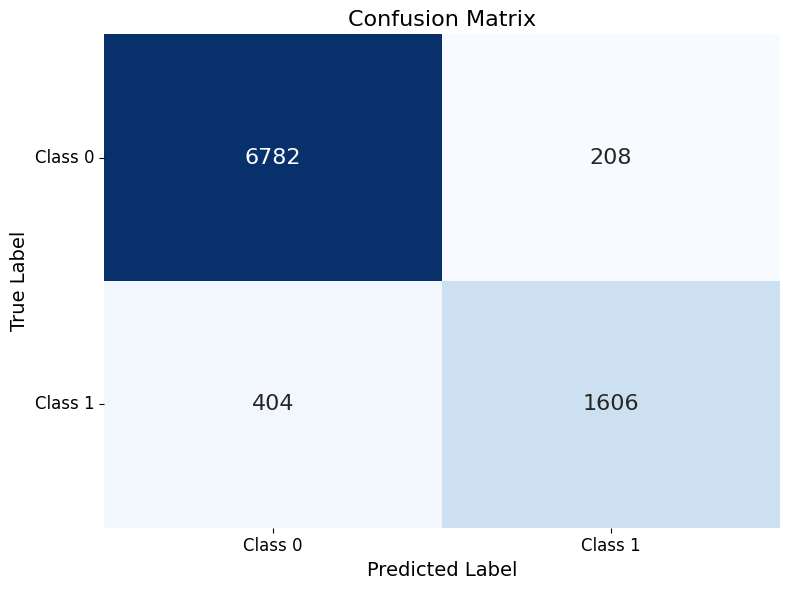

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], fontsize=12, rotation=0)

plt.tight_layout()
plt.show()

## GBM Approach

In [27]:
# Modify the max_features search space to valid values
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        # Modify this line to only use valid values for max_features
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.5, 0.7, 1.0])
    }

    # Initialize GBM model with suggested hyperparameters
    model = GradientBoostingClassifier(
        **param,
        random_state=42
    )

    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy').mean()
    return score

# Create the Optuna study to optimize the objective
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-02-26 00:04:16,561] A new study created in memory with name: no-name-a9c722cb-34ec-489b-8efe-b66193390ea4
[I 2025-02-26 00:05:28,131] Trial 0 finished with value: 0.9321944444444444 and parameters: {'n_estimators': 290, 'learning_rate': 0.09607584692191275, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 3, 'subsample': 0.9139011015891942, 'max_features': 1.0}. Best is trial 0 with value: 0.9321944444444444.
[I 2025-02-26 00:05:48,161] Trial 1 finished with value: 0.9232777777777778 and parameters: {'n_estimators': 153, 'learning_rate': 0.2546648887508179, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 1, 'subsample': 0.6944665988932663, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9321944444444444.
[I 2025-02-26 00:06:04,809] Trial 2 finished with value: 0.9127222222222222 and parameters: {'n_estimators': 283, 'learning_rate': 0.017751750527417856, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 5, 'subsample': 0.7191386612658683,

In [37]:
best_params2 = study.best_params
print('\n# Best Parameters found by Optuna: \n', best_params)


# Best Parameters found by Optuna: 
 {'n_estimators': 291, 'max_depth': 10, 'learning_rate': 0.11048309760141173, 'subsample': 0.7305443091408625, 'colsample_bytree': 0.5887774165902098, 'gamma': 2.0994486165798154, 'min_child_weight': 2}


In [40]:
print("Best Parameters:", best_params)


Best Parameters: {'n_estimators': 291, 'max_depth': 10, 'learning_rate': 0.11048309760141173, 'subsample': 0.7305443091408625, 'colsample_bytree': 0.5887774165902098, 'gamma': 2.0994486165798154, 'min_child_weight': 2}


In [41]:
# Train the best model with the optimal parameters after tuning with Optuna

best_model2=GradientBoostingClassifier(
        **best_params2,
        random_state=42
    )



In [42]:
# Fit the model with the training data
best_model2.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.09607584692191275, max_depth=6,
                           max_features=1.0, min_samples_leaf=3,
                           min_samples_split=6, n_estimators=290,
                           random_state=42, subsample=0.9139011015891942)

In [45]:
# Evaluate the best model on the test set
y_pred2= best_model2.predict(X_test_scaled)

In [46]:
# Output the accuracy and classification report
print("\n# Best Model Accuracy: ", accuracy_score(y_test, y_pred2))
print("\n# Classification Report: \n", classification_report(y_test, y_pred2))


# Best Model Accuracy:  0.9348888888888889

# Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      6990
         1.0       0.89      0.81      0.85      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



# Best Model Performance

The model achieved an **accuracy of 93.49%** on the test set, indicating strong performance in predicting both classes. Below is a detailed breakdown of the classification performance across both classes.

## **Classification Report:**

### **Class 0.0 (Negative Class):**
- **Precision**: **0.95**
  - When the model predicted class 0 (negative class), **95%** of those predictions were correct. This high precision indicates that the model is very accurate when it predicts negative outcomes.
  
- **Recall**: **0.97**
  - The model successfully identified **97%** of all actual negative instances. This high recall suggests that the model is good at detecting negative cases, with very few false negatives.

- **F1-Score**: **0.96**
  - The **F1-score** for class 0 is **0.96**, showing a good balance between precision and recall. The model performs very well at identifying and correctly predicting the negative class.

- **Support**: **6990**
  - There are **6990** instances of class 0 in the test set.

### **Class 1.0 (Positive Class):**
- **Precision**: **0.89**
  - The precision for class 1 is **89%**, meaning that when the model predicted class 1 (positive class), **89%** of those predictions were correct. While this is good, it’s lower than the precision for class 0, suggesting a higher number of false positives for this class.

- **Recall**: **0.81**
  - The recall for class 1 is **81%**, meaning the model correctly identified **81%** of all actual positive instances. While this is still a decent recall, it shows that the model missed **19%** of the positive cases (false negatives).

- **F1-Score**: **0.85**
  - The **F1-score** for class 1 is **0.85**, reflecting a good balance between precision and recall. This score suggests that while the model is fairly good at predicting positive cases, it could improve in identifying more of the positive instances without generating false positives.

- **Support**: **2010**
  - There are **2010** instances of class 1 in the test set.

### **Overall Performance:**
- **Accuracy**: **0.93**
  - The model achieves an overall **accuracy of 93.49%**, indicating strong performance across both classes. The model correctly predicted **93.49%** of the instances in the test set.

- **Macro Average**:
  - **Precision**: **0.92**, **Recall**: **0.89**, **F1-Score**: **0.90**
  - The macro average provides the average performance across both classes, treating both classes equally. The model performs well overall, with a balanced precision and recall.

- **Weighted Average**:
  - **Precision**: **0.93**, **Recall**: **0.93**, **F1-Score**: **0.93**
  - The weighted averages are based on the number of instances in each class. Given the larger number of class 0 instances, the weighted averages show a slight increase in performance for class 0, reflecting the strong overall performance of the model.

---

## **Summary:**
- The model shows **excellent performance** for the **negative class (0.0)**, with high precision, recall, and F1-score.
- For the **positive class (1.0)**, the model performs reasonably well but could benefit from improvements in **recall**, as it misses some positive cases.
- **Overall**, the model is highly accurate and well-balanced, with a **93.49% accuracy** and solid performance across both classes.
- To further improve, efforts could be made to **boost recall** for class 1, possibly by fine-tuning the threshold or adjusting class weights.



# Model Comparison: XGBoost vs. GBM vs. Logistic Regression


| Aspect                      | XGBoost/GBM                             | Logistic Regression                  |
|-----------------------------|-----------------------------------------|--------------------------------------|
| **Model Type**              | Ensemble (Boosting)                    | Linear (Econometric)                 |
| **Performance**             | High accuracy (93-94%)                 | Moderate accuracy (70-90%)           |
| **Strengths**               | Handles non-linearity, robust to overfitting | Interpretable, fast, and simple     |
| **Weaknesses**              | Computationally expensive, less interpretable | Struggles with complex data patterns, non-linear relationships |
| **Best Use Case**           | Large, complex datasets with non-linear relationships | Smaller, simpler datasets with linear relationships |
| **Model Interpretability**  | Low                                    | High                                 |

---

In conclusion, both **XGBoost/GBM** and **Logistic Regression** have their strengths and are suitable for different types of projects. **XGBoost/GBM** is preferable for **high-dimensional, complex datasets**, where prediction accuracy is paramount. 

# Model Comparison: XGBoost/GBM vs Logistic Regression

## **Why XGBoost/GBM Outperform Logistic Regression:**

1. **Complex Relationships**: 
   - **XGBoost/GBM** handle **non-linear** relationships and **feature interactions** better, making them more accurate for complex datasets.
   - **Logistic Regression** assumes linear relationships, limiting its performance on non-linear data.

2. **Performance**: 
   - **XGBoost/GBM** achieve **higher accuracy** (93-94%) compared to **Logistic Regression**, especially on high-dimensional and imbalanced datasets.

3. **Robustness**: 
   - **XGBoost/GBM** are **more robust** to **outliers**, **noise**, and **missing data**, while **Logistic Regression** is more sensitive to outliers and requires data preprocessing.

4. **Handling Imbalanced Classes**:
   - **XGBoost/GBM** handle **class imbalance** better with techniques like **class weighting** and **sampling**.
   - **Logistic Regression** may require additional methods to handle imbalanced classes.

5. **Interpretability**: 
   - **Logistic Regression** provides clear **interpretability** through coefficients, making it easier to explain. 
   - **XGBoost/GBM** are considered **black-box models** with lower interpretability.

---

**Conclusion**: **XGBoost/GBM** outperform **Logistic Regression** in complex tasks involving high-dimensional, non-linear data, while **Logistic Regression** remains valuable for simpler tasks requiring **interpretability**.

